# Ejercicio 5: Implementación de un Perceptrón desde Cero

Este notebook implementa el algoritmo del Perceptrón utilizando únicamente NumPy. Se entrena el modelo con un subconjunto del dataset Iris (dos clases y dos características) para clasificar las flores y se visualiza la frontera de decisión resultante.

# Importamos librerias a usar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap # Importación corregida

# cargamos y procesamos
 la data proviene de la libreria scikit-learn, la libreria scikit fue depricada y a la hora de instalar pide pip install scikit-learn

In [2]:
# Cargar el dataset Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Usamos solo las dos primeras características (largo y ancho del sépalo)
y = iris.target

# Filtramos para quedarnos solo con dos clases: setosa (0) y versicolor (1)
mask = (y == 0) | (y == 1)
X = X[mask]
y = y[mask]

# El Perceptrón clásico usa etiquetas -1 y 1 en lugar de 0 y 1
y = np.where(y == 0, -1, 1)

print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")
print(f"Clases únicas en y: {np.unique(y)}")

Dimensiones de X: (100, 2)
Dimensiones de y: (100,)
Clases únicas en y: [-1  1]


# Visualizamos datos 

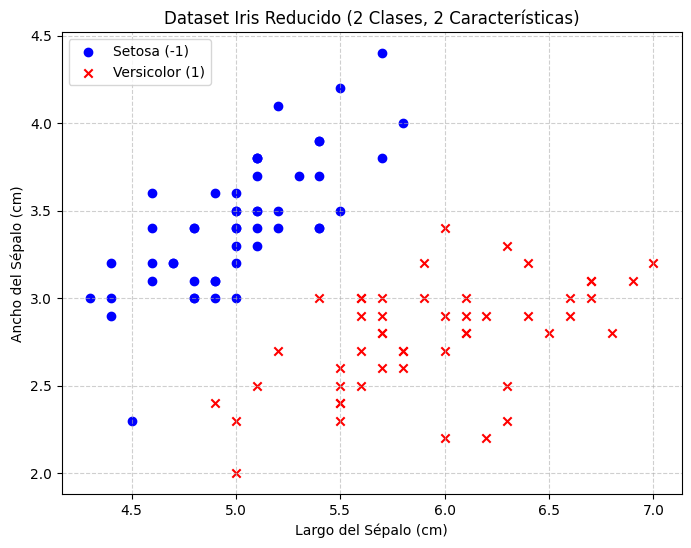

In [3]:
# Graficar los datos para confirmar que son linealmente separables
plt.figure(figsize=(8, 6))
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='blue', marker='o', label='Setosa (-1)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', marker='x', label='Versicolor (1)')

plt.xlabel('Largo del Sépalo (cm)')
plt.ylabel('Ancho del Sépalo (cm)')
plt.title('Dataset Iris Reducido (2 Clases, 2 Características)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# normalizacion y division de los datos

In [4]:
# 1. Normalizar las características para que el gradiente funcione mejor
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# 2. Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.2, random_state=42, stratify=y
)

print(f'Número de muestras de entrenamiento: {X_train.shape[0]}')
print(f'Número de muestras de prueba: {X_test.shape[0]}')

Número de muestras de entrenamiento: 80
Número de muestras de prueba: 20


# definimos el percertron


In [5]:
class Perceptron:
    """Implementación del clasificador Perceptrón."""
    def __init__(self, lr=0.01, n_epochs=50):
        self.lr = lr             # Tasa de aprendizaje
        self.n_epochs = n_epochs # Número de pasadas sobre el dataset
        self.w_ = None           # Pesos después del entrenamiento
        self.errors_ = []        # Errores de clasificación por época

    def fit(self, X, y):
        """Ajusta los datos de entrenamiento."""
        n_samples, n_features = X.shape
        
        # Inicializar pesos a cero (w_0 es el sesgo)
        self.w_ = np.zeros(1 + n_features)
        
        for _ in range(self.n_epochs):
            errors = 0
            for xi, target in zip(X, y):
                # Calcula el cambio en los pesos
                update = self.lr * (target - self.predict(xi))
                
                # Actualiza los pesos y el sesgo
                self.w_[1:] += update * xi
                self.w_[0]  += update
                
                # Cuenta el error si hubo una actualización
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calcula la entrada neta (z)."""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Devuelve la etiqueta de clase después del escalón unitario."""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# primera instancia del modelo 

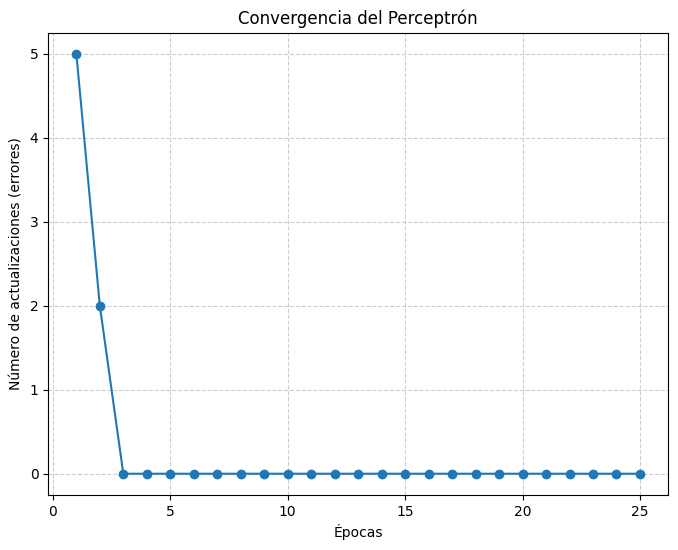

In [6]:
# Instanciar y entrenar el perceptrón
ppn = Perceptron(lr=0.01, n_epochs=25)
ppn.fit(X_train, y_train)

# Graficar los errores por época para ver la convergencia
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones (errores)')
plt.title('Convergencia del Perceptrón')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# visualizacion de division de datos

In [7]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Setup de marcadores y mapa de colores
    markers = ('o', 'x')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Trazar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Trazar las muestras de cada clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Clase {cl}', 
                    edgecolor='k')

# visualizacion de los resultados conjuntos

C:\Users\diego\AppData\Local\Temp\ipykernel_16640\2398747891.py:22: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


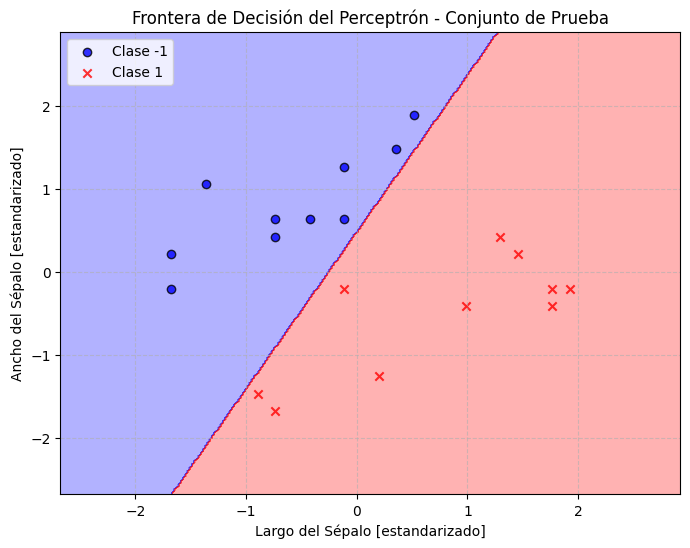

In [8]:
# Graficar la frontera de decisión en el conjunto de prueba
plt.figure(figsize=(8, 6))
plot_decision_regions(X_test, y_test, classifier=ppn)

plt.xlabel('Largo del Sépalo [estandarizado]')
plt.ylabel('Ancho del Sépalo [estandarizado]')
plt.legend(loc='upper left')
plt.title('Frontera de Decisión del Perceptrón - Conjunto de Prueba')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# muestra de precision


In [9]:
# Realizar predicciones en el conjunto de prueba
y_pred = ppn.predict(X_test)

# Calcular y mostrar la precisión (accuracy)
accuracy = np.mean(y_pred == y_test)
print(f'Precisión en el conjunto de prueba: {accuracy:.2%}')

Precisión en el conjunto de prueba: 100.00%
